## $\color{green}{\text{Ciencia de Datos:}}$ Visualización de la Información
UNAM-IIMAS, Semestre 2023-2
## $\color{blue}{\text{Práctica-05: Filtrado de datos}}$


**Alumno:** Axel Daniel Malváez Flores

**$\color{red}{\text{Objetivo}}$:** Analizar detalles sobre los satélites que actualmente orbitan la Tierra, incluido su *país de origen*, *propósito* y otros detalles operativos.

La base de datos a considerar contiene 28 tipos de datos para cada **satélite**, incluida información técnica sobre cada satélite (_masa, potencia, fecha de lanzamiento, vida útil esperada_) y su órbita (_apogeo, perigeo, inclinación y período_), así como información sobre lo que hace el satélite.

- Vamos a presentar números básicos sobre la cadena de valor de los servicios satelitales (como datos sobre lanzadores, fabricantes de satélites, operadores de satélites) y la industria espacial en general.

$\color{blue}{\text{¿Alguna vez te has preguntado cuántos satélites hay encima de nosotros?}}$

**Primer paso: cargar la base de datos**

Estableceremos el índice del marco de datos a la fecha de lanzamiento de cada satélite, contenido en la columna "*Fecha de lanzamiento*" (Date of Launch)

In [148]:
import numpy as np  # útil para muchos cálculos científicos en Python
import pandas as pd # biblioteca de estructura de datos primaria
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.color_palette("colorblind", n_colors=8, desat=.5)
plt.style.use('tableau-colorblind10')

# Esta función personaliza un objeto de barra de gráfico de barras 
# para agregar el número de observaciones.
def set_bar_label(ax_ref, minval=1, orient='h'):
    for p in ax_ref.patches:
        if orient=='h':    
            if p.get_width() >=minval:
                ax_ref.annotate('{}'.format(p.get_width()),xy=(p.get_x()+p.get_width()*1.01,p.get_y()*1.05),fontsize=13)
            else:
                    if p.get_height() >=minval:
                        ax_ref.annotate('{}'.format(p.get_height()),xy=(p.get_x()+0.4*p.get_width(), p.get_y() + p.get_height()*1.01),fontsize=13)

In [149]:
df_sat=pd.read_excel('UCS-Satellite-Database-1-1-2021.xls',index_col='Date of Launch',parse_dates=True,thousands=',')
df_sat.index.name='Date of Launch'
print('Datos cargados')

Datos cargados


El primer paso cuando se trabaja con datos es _**explorarlos**_. El objetivo de este primer paso es identificar **tipos de datos**, **datos faltantes**, **problemas de formato**, etc., que puedan existir en los datos.

Los métodos **.info()** y **.head()** son útiles para determinar los tipos de datos y los datos faltantes. Observemos los nombres de las columnas, el conteo de datos y el tipo de datos.

In [150]:
df_sat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3375 entries, 2019-12-11 to NaT
Data columns (total 66 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name of Satellite, Alternate Names  3372 non-null   object 
 1   Current Official Name of Satellite  3372 non-null   object 
 2   Country/Org of UN Registry          3372 non-null   object 
 3   Country of Operator/Owner           3372 non-null   object 
 4   Operator/Owner                      3372 non-null   object 
 5   Users                               3372 non-null   object 
 6   Purpose                             3372 non-null   object 
 7   Detailed Purpose                    916 non-null    object 
 8   Class of Orbit                      3372 non-null   object 
 9   Type of Orbit                       2751 non-null   object 
 10  Longitude of GEO (degrees)          3371 non-null   float64
 11  Perigee (km)                    

**Segundo paso: limpiar el conjunto de datos**

Algunos de los campos de datos más interesantes incluyen la fecha de lanzamiento del satélite, el fabricante y operador del satélite, el propósito del satélite, el tipo de órbita, incluidos algunos parámetros orbitales, y la capacidad de masa y potencia del satélite.

Pero también, $\color{red}{\text{no es un conjunto de datos perfecto}}$. Vemos los siguientes problemas:

- Faltan datos en algunas de las columnas más interesantes, por ejemplo, carga útil, Masa, Potencia.
- Columnas vacías.

Para tener una idea de cómo se ven los datos, exploremos las primeras y la última fila de datos, usando los métodos **.head()** y **.last()**

In [151]:
df_sat.head()

,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
Date of Launch,,,,,,,,,,,,,,,,,,,,,
2019-12-11,1HOPSAT-TD (1st-generation High Optical Perfor...,1HOPSAT,NR (12/20),USA,Hera Systems,Commercial,Earth Observation,Technology Development,LEO,Non-Polar Inclined,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-11-29,3Cat-1,3Cat-1,NR,Spain,Universitat Politècnica de Catalunya,Civil,Technology Development,NaN,LEO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-23,Aalto-1,Aalto-1,Finland,Finland,Aalto University,Civil,Technology Development,NaN,LEO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-04-25,AAUSat-4,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-02-06,"ABS-2 (Koreasat-8, ST-3)",ABS-2,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
df_sat.tail(2)

,"Name of Satellite, Alternate Names",Current Official Name of Satellite,Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,...,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66
Date of Launch,,,,,,,,,,,,,,,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Tipos de datos y datos faltantes**

Como se mencionó anteriormente, la base de datos contiene algunas columnas con comentarios y puntos de datos faltantes. También contiene filas completamente vacías, como se observó en la salida del método **.tail()**. 

Para nuestro trabajo exploratorio, se descartan las últimas filas innecesarias, que no contienen datos en la columna "_Nombre del satélite, nombres alternativos_", todas las columnas que no contengan más de 5 puntos de datos válidos (es decir, al menos 5 filas con datos válidos en la columna, usando el método **.dropna()**), y finalmente se convertirá a numéricas las columnas que deben contener datos numéricos.

Luego, después de eliminar las filas problemáticas a las que les faltan las fechas de lanzamiento, ordenaremos el índice (**fecha de lanzamiento**) cronológicamente. 

In [153]:
# Quitar filas con NaN,
df_sat = df_sat[ df_sat['Name of Satellite, Alternate Names'].notna() ]

# Soltar columnas con menos de 5 elementos válidos
df_sat.dropna( axis='columns', thresh=5, inplace=True)

# Corregir los espacios adicionales en las columnas de categoría
df_sat['Users']=df_sat['Users'].str.strip()

# Asegúrese de que las columnas numéricas sean del tipo correcto
df_sat[['Dry Mass (kg.)', 'Launch Mass (kg.)', 'Eccentricity', 'Inclination (degrees)','Period (minutes)', 'Power (watts)']]=\
    df_sat[['Dry Mass (kg.)', 'Launch Mass (kg.)', 'Eccentricity', 'Inclination (degrees)','Period (minutes)', 'Power (watts)']]\
                                                                                            .apply(pd.to_numeric,errors='coerce')
# Ordenar el índice.
df_sat.sort_index(axis=0, inplace=True, ascending=True)
df_sat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3372 entries, 1974-11-15 to 2020-12-28
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name of Satellite, Alternate Names  3372 non-null   object 
 1   Current Official Name of Satellite  3372 non-null   object 
 2   Country/Org of UN Registry          3372 non-null   object 
 3   Country of Operator/Owner           3372 non-null   object 
 4   Operator/Owner                      3372 non-null   object 
 5   Users                               3372 non-null   object 
 6   Purpose                             3372 non-null   object 
 7   Detailed Purpose                    916 non-null    object 
 8   Class of Orbit                      3372 non-null   object 
 9   Type of Orbit                       2751 non-null   object 
 10  Longitude of GEO (degrees)          3371 non-null   float64
 11  Perigee (km)             

Además de esto, ahora es importante explorar las columnas numéricas para asegurarse de que no haya **ceros** donde puedan ser problemáticos. Por ejemplo, un cero en las columnas _Masa seca, Masa de lanzamiento, Potencia_ no es un punto de datos correcto. Después de inspeccionar, el $\color{blue}{\text{satélite NSS-6}}$ parece tener un $\color{red}{\text{cero}}$ en la columna **Potencia** (vatios).

In [154]:
## Identificar CERO en las columnas de Masa o Potencia
isZeroPower_idx = df_sat['Power (watts)'] == 0
isZeroDryMass_idx = df_sat['Dry Mass (kg.)'] == 0
isZeroLaunchMass_idx = df_sat['Launch Mass (kg.)'] == 0

print('Número de entradas en las columnas Potencia, Masa de lanzamiento y Masa seca establecidas en cero')
print('-------------------------------------------------------------------------')
print(' Número de puntos de datos que faltan en la columna Potencia: {}'.format(isZeroPower_idx.sum()))
print(df_sat[isZeroPower_idx]['Current Official Name of Satellite'].to_string())
print('-------------------------------------------------------------------------')
print(' Número de puntos de datos faltantes en columna de Masa seca: {}'.format(isZeroDryMass_idx.sum()))
print(' Número de puntos de datos que faltan en la columna Masa de lanzamiento: {}'.format(isZeroLaunchMass_idx.sum()))

Número de entradas en las columnas Potencia, Masa de lanzamiento y Masa seca establecidas en cero
-------------------------------------------------------------------------
 Número de puntos de datos que faltan en la columna Potencia: 1
Date of Launch
2002-12-17    NSS-6
-------------------------------------------------------------------------
 Número de puntos de datos faltantes en columna de Masa seca: 0
 Número de puntos de datos que faltan en la columna Masa de lanzamiento: 0


Según la información disponible en una *versión anterior* de la base de datos (UCS-Satellite-Database-8-1-2020.xls), la plataforma del satélite entrega 10 KW de potencia.

In [155]:
# Establezca el valor de POTENCIA (vatios) para NSS-6 en 10000
df_sat.loc[isZeroPower_idx,'Power (watts)'] = 10000
print(df_sat[isZeroPower_idx]['Power (watts)'].to_string())

Date of Launch
2002-12-17    10000.0


$\color{blue}{\text{Ahora el marco de datos está más limpio y podemos comenzar nuestro trabajo exploratorio}}$.

Las **estaciones terrestres de satélites** son instalaciones diseñadas con el fin de proporcionar una comunicación directa y en tiempo real con los satélites. Estos se pueden colocar hasta en 5 órbitas en el espacio en función de las necesidades de cada uno. 

- La **$\color{blue}{\text{órbita LEO}}$** u **órbita baja** es una amplia franja que se sitúa entre los 160 y los 2000 kilómetros de altura. Los objetos situados en esta órbita se mueven a gran velocidad respecto de la superficie terrestre, por lo cubren una órbita completa en pocos minutos o pocas horas. Aquí se sitúan la Estación Espacial Internacional y la mayoría de los satélites meteorológicos de observación y muchos satélites de comunicaciones. 

- La **$\color{red}{\text{órbita MEO}}$** u **órbita circular intermedia** se halla entre los 2000 y 36000 kilómetros de altura. Su periodo orbital tiene un promedio de 12 horas y aquí se sitúan los satélites de observación, defensa y posicionamiento, las redes satelitales de GPS y los satélites Glonass rusos o los Galileo europeos. 

- La **órbita geoestacionaria** u **$\color{green}{\text{órbita GEO}}$** se sitúa a 35786 kilómetros de la superficie terrestre. Su periodo orbital es de 24 horas y en ella se ubican todos los satélites que proveen internet, televisión, telefonía y otros datos a diferentes regiones del planeta. 

- La **$\color{magenta}{\text{órbita HEO}}$** u **órbita alta** se halla a más de 36000 kilómetros de altura y tiene un periodo orbital de más de 24 horas. Por último, tendríamos ya la **órbita SSO** u **órbita sincrónica solar**.

**Comencemos la exploración.**

**Actividad:** Encuentre el satélite en funcionamiento más antiguo y más reciente.

Determinamos esto usando el método **.iloc()** en el primer y último elemento del marco de datos:

In [156]:
print(df_sat.iloc[0,0:5].to_string())

Name of Satellite, Alternate Names    Amsat-Oscar 7 (AO-7)
Current Official Name of Satellite           Amsat-Oscar 7
Country/Org of UN Registry                             USA
Country of Operator/Owner                              USA
Operator/Owner                                    AMSAT-NA


In [157]:
print(df_sat.iloc[-1,0:5].to_string())

Name of Satellite, Alternate Names         CSO-2 (Optical Space Component-2)
Current Official Name of Satellite                                     CSO-2
Country/Org of UN Registry                                        NR (12/20)
Country of Operator/Owner                                             France
Operator/Owner                        Directorate General of Armaments (DGA)


La base de datos contiene información sobre satélites, su tipo de órbita y usos principales. Para determinar el satélite más antiguo en órbita geoestacionaria, utilizado con fines **comerciales**, debemos aplicar una _indexación booleana_ utilizando las columnas 'Clase de órbita' y 'Usuarios'

In [158]:
print(df_sat[(df_sat['Class of Orbit']=='GEO') & (df_sat['Users']=='Commercial')].iloc[0,0:8].to_string())

Name of Satellite, Alternate Names         Astra 1D 
Current Official Name of Satellite          Astra 1D
Country/Org of UN Registry                Luxembourg
Country of Operator/Owner                 Luxembourg
Operator/Owner                              SES S.A.
Users                                     Commercial
Purpose                               Communications
Detailed Purpose                                 NaN


**Actividad:** Encuentre el satélite más pesado en operaciones

In [159]:
heaviest_sat = df_sat[['Dry Mass (kg.)']].idxmax()
print(df_sat.loc[heaviest_sat,['Name of Satellite, Alternate Names','Operator/Owner','Class of Orbit','Dry Mass (kg.)']].to_string())

                                                   Name of Satellite, Alternate Names                        Operator/Owner Class of Orbit  Dry Mass (kg.)
Date of Launch                                                                                                                                            
2005-10-19      Keyhole 5 (Advanced KH-11, KH-12-5, Improved Crystal, EIS-3, USA 186)  National Reconnaissance Office (NRO)            LEO         10000.0


Además de la información sobre la fecha de lanzamiento y el nombre del satélite, la base de datos contiene variables como el país que registró el satélite en la ONU (País de registro de la ONU, país al que pertenece el operador del satélite (País del operador).

_$\color{blue}{\text{Con esta información podemos explorar qué tan activos son los países en el espacio}}$._

**¿Qué países son más activos en el espacio?** 

**Exploración a nivel de país**: Al observar el _país de registro_ y el _país del operador_, podríamos medir la actividad del sector espacial de un país.

In [160]:
# Determinar el número de satélites por país de registro y operador, para todos los países.
# La serie devuelta contiene la suma de satélites de todos los países, ordenados por valor.
# Nota: Debemos eliminar las entradas No registradas (NR) de la columna 
# 'País/Org del Registro de la ONU' antes de realizar el conteo.

nbr_sats_per_cnt_reg=df_sat['Country/Org of UN Registry'].value_counts()
nbr_sats_per_cnt_op=df_sat['Country of Operator/Owner'].value_counts()

print('Array sizes: Per country of registration {} per country of operator {}'.format(nbr_sats_per_cnt_reg.shape, nbr_sats_per_cnt_op.shape ))

Array sizes: Per country of registration (67,) per country of operator (101,)


Las variables **nbr_sats_per_reg** y **nbr_sats_per_op** contienen el número de satélites por país de registro y por país de operador, ordenados por valor ascendente. Como la cantidad de países en cada matriz es bastante grande, la siguiente celda explora los *cinco principales* de cada variable:

In [161]:
# Número de satélites según el país de registro, clasificados entre los 5 primeros.
print('Recuento total de satélites (top 5), por país de registro de la ONU')
print('-------------------------------------------------------------')
print(df_sat[df_sat['Country/Org of UN Registry'].str.contains("NR")==0]['Country/Org of UN Registry'].value_counts()[:5].to_string())

Recuento total de satélites (top 5), por país de registro de la ONU
-------------------------------------------------------------
USA               1648
China              235
Russia             161
United Kingdom     138
France              68


In [162]:
# Número de satélites según el país del operador/propietario, clasificados entre los 5 primeros.
print('Recuento total de satélites (top 5), por país del operador')
print('------------------------------------------------------')
print(df_sat['Country of Operator/Owner'].value_counts()[:5].to_string())

Recuento total de satélites (top 5), por país del operador
------------------------------------------------------
USA               1878
China              405
Russia             174
United Kingdom     166
Japan               82


**$\color{red}{\text{NOTA}}$: Puede ser mejor visualizar esta información, en lugar de presentarla como texto.**

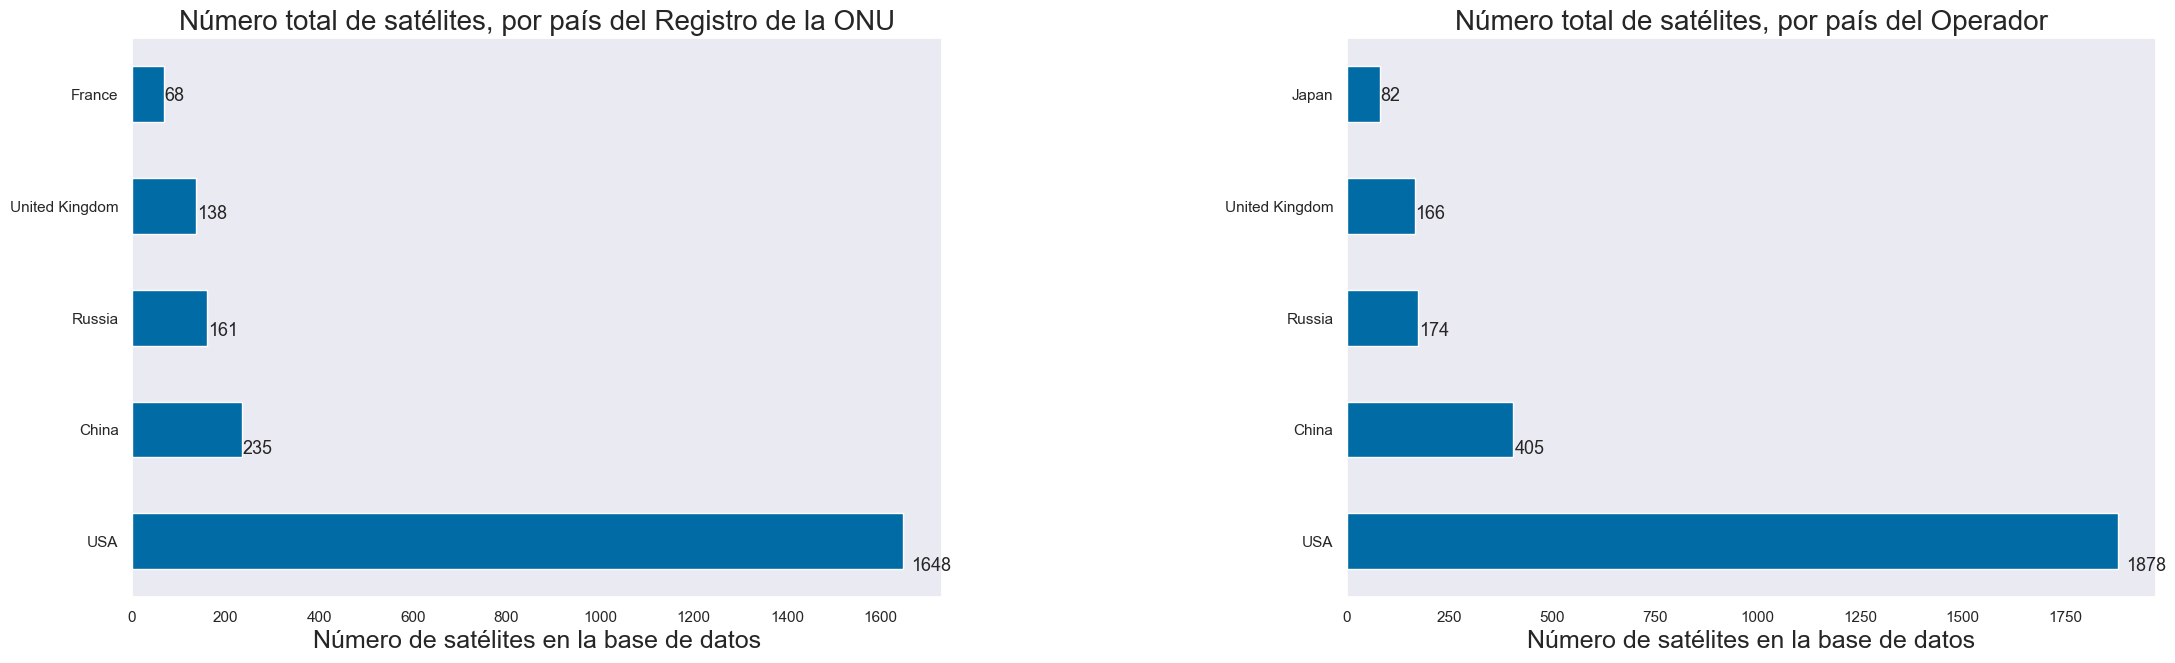

In [163]:
# Un gráfico de barras para los cinco países principales,
fig, ax = plt.subplots(nrows=1, ncols=2)
fig.tight_layout(pad=0.0)
fig.set_size_inches(14,6)
ax1=df_sat[df_sat['Country/Org of UN Registry'].str.contains("NR")==0]['Country/Org of UN Registry'].value_counts()[:5].plot(kind='barh',ax=ax[0])
ax2=nbr_sats_per_cnt_op[0:5].plot(kind='barh')
plt.subplots_adjust(right=1.5,wspace=0.5)

# Establecer un etiquetado: leyenda, título
ax1.set_xlabel('Número de satélites en la base de datos', fontsize=18)
ax1.set_title('Número total de satélites, por país del Registro de la ONU', fontsize=20)
ax2.set_xlabel('Número de satélites en la base de datos', fontsize=18)
ax2.set_title('Número total de satélites, por país del Operador', fontsize=20)

# Anotar
set_bar_label(ax1)
set_bar_label(ax2)

Los resultados probablemente no sean una sorpresa: los países que han registrado la mayoría de los satélites y que operan la mayoría de los satélites son **EE. UU.**, **China** y **Rusia**.

**¿Desde dónde se lanzan los satélites?**

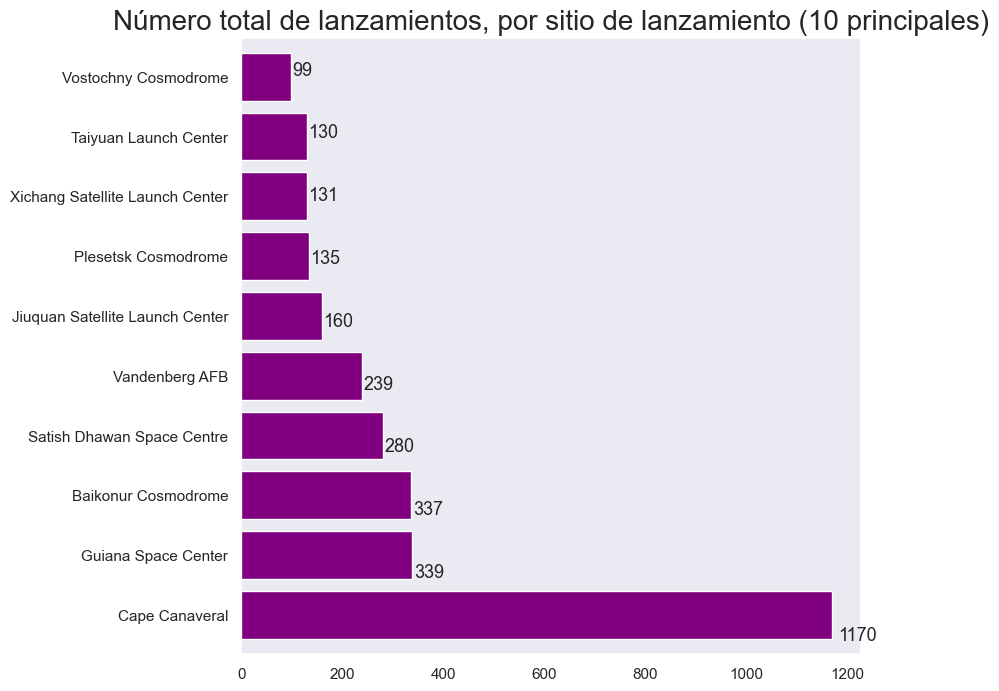

In [164]:
axTen = df_sat['Launch Site'].value_counts()[:10].plot(kind='barh', color='purple',width=0.8, figsize=(8,8))
set_bar_label(axTen, orient='h')
_=axTen.set_title('Número total de lanzamientos, por sitio de lanzamiento (10 principales)', fontsize=20)

In [165]:
nbr_sats_per_launch_site=df_sat['Launch Site'].value_counts()
print('Lista de los 10 principales sitios de lanzamiento, ordenados por número de satélites lanzados')
print('--------------------------------------------------------------------')
print(nbr_sats_per_launch_site[0:10].to_string())

Lista de los 10 principales sitios de lanzamiento, ordenados por número de satélites lanzados
--------------------------------------------------------------------
Cape Canaveral                     1170
Guiana Space Center                 339
Baikonur Cosmodrome                 337
Satish Dhawan Space Centre          280
Vandenberg AFB                      239
Jiuquan Satellite Launch Center     160
Plesetsk Cosmodrome                 135
Xichang Satellite Launch Center     131
Taiyuan Launch Center               130
Vostochny Cosmodrome                 99


**¿Y qué vehículos se utilizan para lanzarlos?**

También podemos repetir el principio para los vehículos de lanzamiento, usando los datos en la columna "*Vehículo de lanzamiento*". Tenga en cuenta que

- Existe lanzamiento de varios vehículos desde el mismo sitio.

- Los vehículos de lanzamiento pueden lanzarse desde diferentes sitios según la misión.

In [166]:
nbr_sats_per_launch_vehicle=df_sat['Launch Vehicle'].value_counts()
print('Lista de lanzadores por número de satélites lanzados en total, 10 principales')
print('---------------------------------------------------------------')
print(nbr_sats_per_launch_vehicle[0:10].to_string())

Lista de lanzadores por número de satélites lanzados en total, 10 principales
---------------------------------------------------------------
Falcon 9         1102
PSLV              204
Atlas 5           103
Soyuz 2.1a        102
Long March 2D      90
Ariane 5           89
Soyuz-2.1b         80
Electron           79
Long March 3B      76
Proton M           73


In [167]:
BySite_group = df_sat.groupby(['Launch Site','Launch Vehicle']) 
nbr_Starlink_launched_from_cc = BySite_group.get_group(('Cape Canaveral','Falcon 9'))['Name of Satellite, Alternate Names'].str.contains('tarlink').sum()
nbr_NonStarlink_launched_from_cc = BySite_group.get_group(('Cape Canaveral','Falcon 9'))['Name of Satellite, Alternate Names'].str.contains('^((?!tarlink).)*$').sum()

print(' - Número de satélites Starlink lanzados con Falcon 9 desde Cabo Cañaveral : ', nbr_Starlink_launched_from_cc )
print(' - Número de satélites que no son Starlink lanzados con Falcon 9 desde Cabo Cañaveral : ', nbr_NonStarlink_launched_from_cc )
print(' - Total lanzado desde Cabo Cañaveral usando Falcon 9: ', nbr_Starlink_launched_from_cc+nbr_NonStarlink_launched_from_cc)

 - Número de satélites Starlink lanzados con Falcon 9 desde Cabo Cañaveral :  902
 - Número de satélites que no son Starlink lanzados con Falcon 9 desde Cabo Cañaveral :  64
 - Total lanzado desde Cabo Cañaveral usando Falcon 9:  966


/var/folders/8l/f787_tgj7sg6grwn27dvfx0h0000gn/T/ipykernel_80043/2496532840.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  nbr_NonStarlink_launched_from_cc = BySite_group.get_group(('Cape Canaveral','Falcon 9'))['Name of Satellite, Alternate Names'].str.contains('^((?!tarlink).)*$').sum()


Ahora, una mirada más cercana a los **primeros 15 satélites** lanzados con $\color{blue}{\text{Falcon 9}}$.

In [168]:
# Para modificar el código para ver, digamos, solo los primeros 10 lanzamientos, 
# agregue [0:11] después de los nombres de las columnas en la función de impresión ().
ByLaunchSite = df_sat.groupby(['Launch Vehicle'])
display(ByLaunchSite.get_group('Falcon 9')[['Launch Site','Name of Satellite, Alternate Names']][0:16])

,Launch Site,"Name of Satellite, Alternate Names"
Date of Launch,,
2013-09-29,Vandenberg AFB,Cassiope (CAScade SmallSat and Ionospheric Pol...
2013-12-03,Cape Canaveral,SES-8
2014-01-06,Cape Canaveral,Thaicom-6
2014-07-14,Cape Canaveral,ORBCOMM OG2 FM-109
2014-07-14,Cape Canaveral,ORBCOMM OG2 FM-103
2014-07-14,Cape Canaveral,ORBCOMM OG2 FM-107
2014-08-05,Cape Canaveral,AsiaSat-8
2014-09-07,Cape Canaveral,AsiaSat-6 (Thaicom-7)
2015-03-02,Cape Canaveral,Eutelsat 115 West B


La base de datos también contiene información sobre para qué se utilizan los satélites. Podemos responder preguntas como,

**¿Cuántos satélites de comunicación con fines comerciales están en operación, agrupados por clase de órbita?**

In [169]:
cross_tab = pd.crosstab( df_sat['Users'], df_sat['Class of Orbit'],margins=True)
display(cross_tab)

Class of Orbit,Elliptical,GEO,LEO,MEO,All
Users,,,,,
Civil,3,0,146,1,150
Civil/Government,0,0,2,0,2
Civil/Military,0,0,2,0,2
Commercial,5,313,1721,44,2083
Commercial/Civil,0,0,11,0,11
Commercial/Government,0,1,0,0,1
Commercial/Military,0,2,0,0,2
Government,23,99,347,0,469
Government/Civil,3,4,35,0,42


Dado que el conjunto de datos tiene usos mixtos, necesitaríamos algunas líneas de código más para sumar todas las categorías que contienen un uso comercial, para cada tipo de órbita. A continuación se muestra una forma de hacerlo.

In [170]:
gb=df_sat.groupby(['Class of Orbit','Users'])

# Calcular el total por clase de órbita, utilizando métodos de cálculo directo. 
# Tenga en cuenta que esto también se puede lograr a través de filtros e indexación lógica.
nbr_GEO_comm_sats = gb.get_group(('GEO','Commercial'))['Name of Satellite, Alternate Names'].count() + \
              gb.get_group(('GEO','Commercial/Military'))['Name of Satellite, Alternate Names'].count() + \
              gb.get_group(('GEO','Commercial/Government'))['Name of Satellite, Alternate Names'].count()

nbr_MEO_comm_sats = gb.get_group(('MEO','Commercial'))['Name of Satellite, Alternate Names'].count() #+ \
             # gb.get_group(('MEO','Military/Commercial'))['Name of Satellite, Alternate Names'].count()

nbr_LEO_comm_sats = gb.get_group(('LEO','Commercial'))['Name of Satellite, Alternate Names'].count() + \
              gb.get_group(('LEO','Commercial/Civil'))['Name of Satellite, Alternate Names'].count() + \
              gb.get_group(('LEO','Government/Commercial'))['Name of Satellite, Alternate Names'].count() +\
              gb.get_group(('LEO','Military/Commercial'))['Name of Satellite, Alternate Names'].count()

print('Totales por clase de órbita')
print('-------------------------------------------------')
print('Número de satélites GEO para uso comercial: ', nbr_GEO_comm_sats)
print('Número de satélites MEO para uso comercial: ', nbr_MEO_comm_sats)
print('Número de satélites LEO para uso comercial: ', nbr_LEO_comm_sats)

Totales por clase de órbita
-------------------------------------------------
Número de satélites GEO para uso comercial:  316
Número de satélites MEO para uso comercial:  44
Número de satélites LEO para uso comercial:  1819


**¿Cuántos satélites se utilizan para servicios de telecomunicaciones, por tipo de órbita?**

Podemos subdividir aún más los datos por órbita y usuario y centrarnos en un propósito específico, el de los _servicios de comunicación comercial_.

Número total de satélites comerciales de comunicaciones, por clase de órbita
------------------------------------------------------------------------
Número de satélites LEO para uso de comunicaciones comerciales:  1266
Número de satélites MEO para uso de comunicaciones comerciales:  20
Número de satélites GEO para uso de comunicaciones comerciales:  340


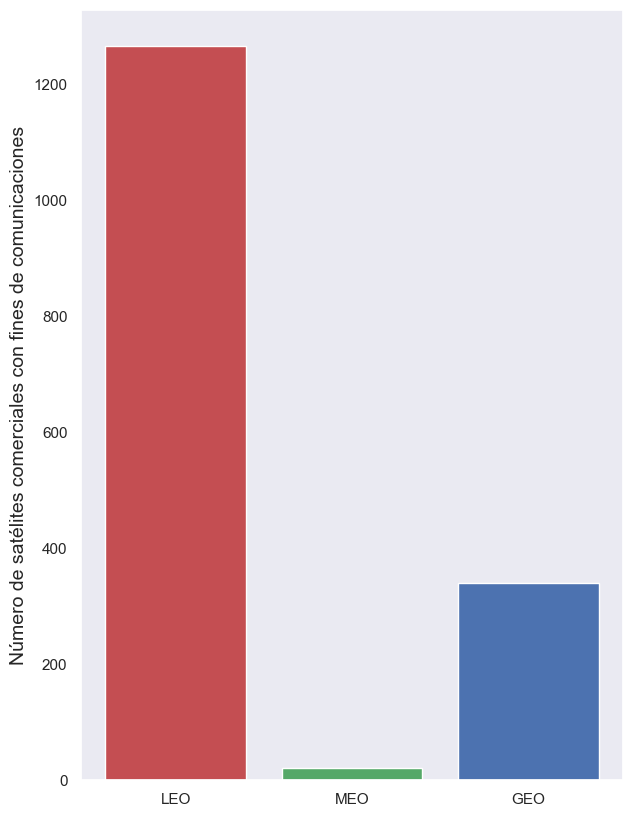

In [171]:
# Para que este conteo funcione, es importante recordar que hay ciertas entradas en la base de datos de "uso mixto", 
# es decir, un satélite con cargas útiles con propósitos duales, como comercial/militar o gubernamental/militar.
# Esto es lo que se utilizó una suma directa de cada categoría en las celdas anteriores.
# Ahora se intentará un enfoque de indexación lógica usando el método str.contains() 
# y buscando las palabras clave Comercial y Comunicación dentro de las columnas Usuarios y Propósito.

idx_isLEO_isCOM_isCOMMS = (df_sat['Class of Orbit']=='LEO') & (df_sat['Users'].str.contains('commercial',case=False) ) & (df_sat['Purpose'].str.contains('communication',case=False))
idx_isMEO_isCOM_isCOMMS = (df_sat['Class of Orbit']=='MEO') & (df_sat['Users'].str.contains('commercial',case=False) ) & (df_sat['Purpose'].str.contains('communication',case=False))
idx_isGEO_isCOM_isCOMMS = (df_sat['Class of Orbit']=='GEO') & (df_sat['Users'].str.contains('commercial',case=False) ) & (df_sat['Purpose'].str.contains('communication',case=False))

# El número de entradas es la suma de la serie de indexación booleana.
nbr_LEO_com_comms_sats =idx_isLEO_isCOM_isCOMMS.sum()
nbr_MEO_com_comms_sats =idx_isMEO_isCOM_isCOMMS.sum()
nbr_GEO_com_comms_sats =idx_isGEO_isCOM_isCOMMS.sum()

print('Número total de satélites comerciales de comunicaciones, por clase de órbita')
print('------------------------------------------------------------------------')
print('Número de satélites LEO para uso de comunicaciones comerciales: ', nbr_LEO_com_comms_sats)
print('Número de satélites MEO para uso de comunicaciones comerciales: ', nbr_MEO_com_comms_sats)
print('Número de satélites GEO para uso de comunicaciones comerciales: ', nbr_GEO_com_comms_sats)

# Un gráfico de barras
fbar,barax=plt.subplots()
fbar.set_size_inches(7,10)
barax.bar( ['LEO', 'MEO', 'GEO'], [nbr_LEO_com_comms_sats, nbr_MEO_com_comms_sats, nbr_GEO_com_comms_sats], color=['r', 'g','b'])

# Anotar barras,
set_bar_label(barax,minval=1, orient='v')
barax.set_ylabel('Número de satélites comerciales con fines de comunicaciones', fontsize=14)
plt.show()

Por lo tanto, hay casi tres veces más satélites LEO con fines comerciales que satélites GEO. 

**¿Significa esto que los sistemas LEO son más exitosos que los sistemas GEO?** 

No necesariamente. Los satélites en la órbita LEO se mueven muy rápido en relación con un punto fijo en la tierra. Los satélites GEO, en cambio, aparecen fijos en un punto de la tierra. Entonces, para una cobertura o servicio continuo, los sistemas desplegados en la órbita LEO necesitan más de un satélite, necesitan una constelación.  

Algunas constelaciones bien conocidas de servicios de comunicaciones incluyen **Iridium, Orbcomm, Globalstar** y los relativamente nuevos **OneWeb** y **SpaceX Systems**. Los satélites LEO tienden a ser más pequeños (y livianos) que sus contrapartes GEO, ya que la naturaleza de la carga útil es diferente. 

Cambiar el enfoque a operadores GEO, con énfasis en SATCOM comerciales,

Hay 74 operadores GEO satcomm en la lista
----------------------------------------------


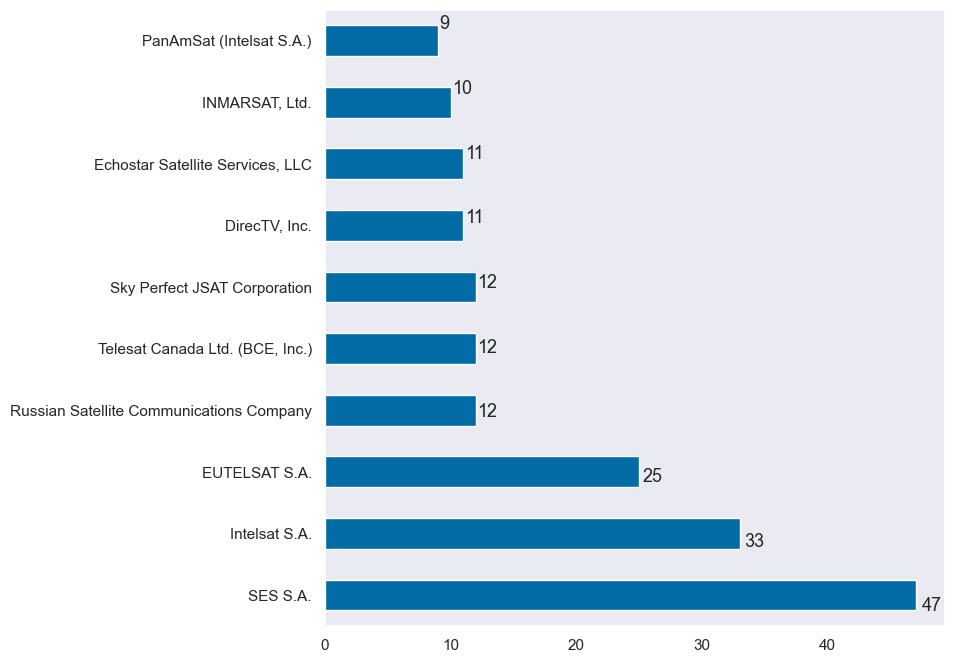

In [172]:
# Una mirada más cercana a los operadores GSO, con un enfoque comercial en el dominio de las telecomunicaciones, arroja los siguientes tamaños de flota 
# Primero creamos una lista con los nombres de los operadores,
GSO_comm_ops = np.unique(df_sat['Operator/Owner'][(df_sat['Users'] == 'Commercial') & (df_sat['Purpose'] == 'Communications')& (df_sat['Class of Orbit'] == 'GEO')])

# la longitud de la lista es 74, lo que significa que hay 74 operadores que cumplen las tres condiciones establecidas en nuestra consulta anterior.
print('Hay {} operadores GEO satcomm en la lista'.format(len(GSO_comm_ops)))
print('----------------------------------------------')

# Alternativamente, podemos usar un enfoque más complejo pero compacto, 
# como hicimos en las figuras anteriores, usando Value_counts()
ax4 = df_sat['Operator/Owner'][(df_sat['Users'] == 'Commercial') & (df_sat['Purpose'] == 'Communications') \
                              & (df_sat['Class of Orbit'] == 'GEO')].value_counts()[0:10].plot(kind='barh',figsize=(8,8))
_=set_bar_label(ax4)

Un problema con el análisis anterior es que el nombre de un operador de satélite aparece varias veces, en forma diferente. Por ejemplo, en los casos en que comparte la plataforma con otro operador. Por ejemplo, un satélite podría asignarse a un operador como

- Telesat Canadá,
- Telesat Canada Ltd. (BCE, Inc.)/APT Satellite Holdings Ltd.

que se registrarán como operadores separados. Además, las entidades fusionadas aparecen como separadas (ver Panamsat/Intelsat o SES/O3B).

Hagamos una búsqueda más específica, para lo que se conoce como los "Cuatro Grandes" operadores FSS: **Eutelsat, Intelsat, SES, Telesat**, buscando cualquier satélite que tenga esas compañías listadas como operadores en cualquier combinación en la cadena, y, en el caso de SES, añadiendo la constelación O3B en órbita MEO.

In [173]:
IS_count=np.sum(df_sat['Operator/Owner'].str.contains('intelsat',case=False) & df_sat['Users'].str.contains('Commercial'))
EUT_count=np.sum(df_sat['Operator/Owner'].str.contains('eutelsat',case=False) & df_sat['Users'].str.contains('Commercial'))
TEL_count=np.sum(df_sat['Operator/Owner'].str.contains('telesat',case=False) & df_sat['Users'].str.contains('Commercial'))
SES_count=np.sum(df_sat['Operator/Owner'].str.contains('ses',case=False) & df_sat['Users'].str.contains('Commercial')) + \
          np.sum(df_sat['Operator/Owner'].str.contains('o3b',case=False) & df_sat['Users'].str.contains('Commercial'))

print('UCS contiene : ')
print('---------------------------')
print(' {} satélites Eutelsat'.format(EUT_count))
print(' {} satélites Intelsat'.format(IS_count))
print(' {} satélites SES/O3B'.format(SES_count))
print(' {} satélites Telesat'.format(TEL_count))

UCS contiene : 
---------------------------
 32 satélites Eutelsat
 50 satélites Intelsat
 72 satélites SES/O3B
 15 satélites Telesat


**¿Para qué se utilizan los satélites de comunicaciones GEO?**

Podemos revisar los usos de los satélites de órbita geoestacionaria estudiando las categorías en la columna "Usuarios" del marco de datos

Users
Commercial                        313
Commercial/Government               1
Commercial/Military                 2
Government                         99
Government/Civil                    4
Government/Commercial              11
Government/Commercial/Military      1
Government/Military                 3
Military                           92
Military/Commercial                14
Military/Government                22
Name: Purpose, dtype: int64


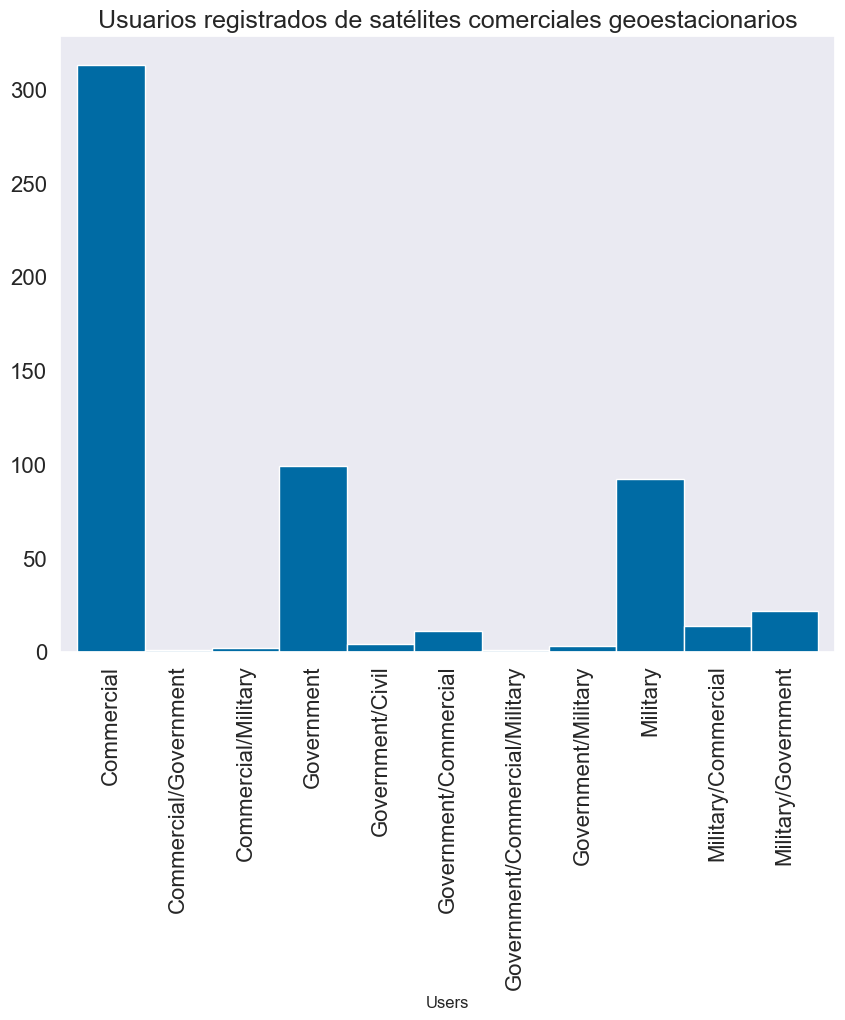

In [174]:
# Extraiga todos los puntos de datos para la órbita GEO, mire la columna de longitud
geo_flt_id = (df_sat['Class of Orbit'] == 'GEO')
GEO_df = df_sat[geo_flt_id]
GEO_byUser=GEO_df.groupby(['Users'])['Purpose'].count()
f=GEO_byUser.plot(kind='bar',figsize=(10,8), fontsize=16, width=1, position=0.5)
f.set_title('Usuarios registrados de satélites comerciales geoestacionarios', fontsize=18)
_=set_bar_label(f,1,'v')

print(GEO_byUser)

**Sistemas de navegación**

Teniendo en cuenta las noticias sobre el sistema BEIDOU de China, veamos el tamaño de tres constelaciones de navegación: el **sistema GPS** de EE. UU. (DoD/US Air Force GPS system), el **sistema GALILEO** de Europa y el **BEIDOU** de China.

Para contar cuántos satélites hay en cada constelación, se hará una búsqueda de cadenas en el nombre y se contarán las coincidencias. Esto capturará cualquier satélite, independientemente de su órbita (el sistema Beidou tiene satélites en órbita MEO y GEO):

In [175]:
DOD_GPS = df_sat['Name of Satellite, Alternate Names'].str.contains('navstar gps',case=False).sum()
EU_GALILEO = df_sat['Name of Satellite, Alternate Names'].str.contains('galileo',case=False).sum()
CH_BEIDOU = df_sat['Name of Satellite, Alternate Names'].str.contains('beidou',case=False).sum()
print('Recuento de satélites operativos (ENE-2021) en tres constelaciones de navegación:')
print('-----------------------------------------------------------------------------')
print('US DoD GPS    : {} satélites '.format(DOD_GPS))
print('EU GALILEO    : {} satélites '.format(EU_GALILEO))
print('CHINA BEIDOU  : {} satélites '.format(CH_BEIDOU))

Recuento de satélites operativos (ENE-2021) en tres constelaciones de navegación:
-----------------------------------------------------------------------------
US DoD GPS    : 34 satélites 
EU GALILEO    : 26 satélites 
CHINA BEIDOU  : 49 satélites 


## Ejercicio-01: Explorando números por contratista

Finalmente, dada la información en la columna Contractor ("Contratista"), también es posible evaluar el número de naves espaciales construidas por cada fabricante. Tenga en cuenta que, al igual que con el nombre del operador, es posible que las naves espaciales construidas por un fabricante en la actualidad deban agregarse a partir de varias entradas.

**Sin fusionar fabricantes, presente un gráfico de barras para los 15 mejores resultados por número de satélites**.

In [176]:
satelites=pd.read_excel('UCS-Satellite-Database-1-1-2021.xls',index_col='Date of Launch',parse_dates=True,thousands=',')
satelites.index.name='Date of Launch'
#satelites.head()

In [177]:
import re

def remove_except_num(string):
    return re.sub(r'[^0-9]', '', string)

counts = satelites['Contractor'].value_counts()
df = pd.DataFrame(counts, columns=['Contractor'])
contractors = []
for x in df.iterrows():
    if re.search(r'/', x[0]) is None:
        contractors.append([x[0], remove_except_num(x[1].to_string())])

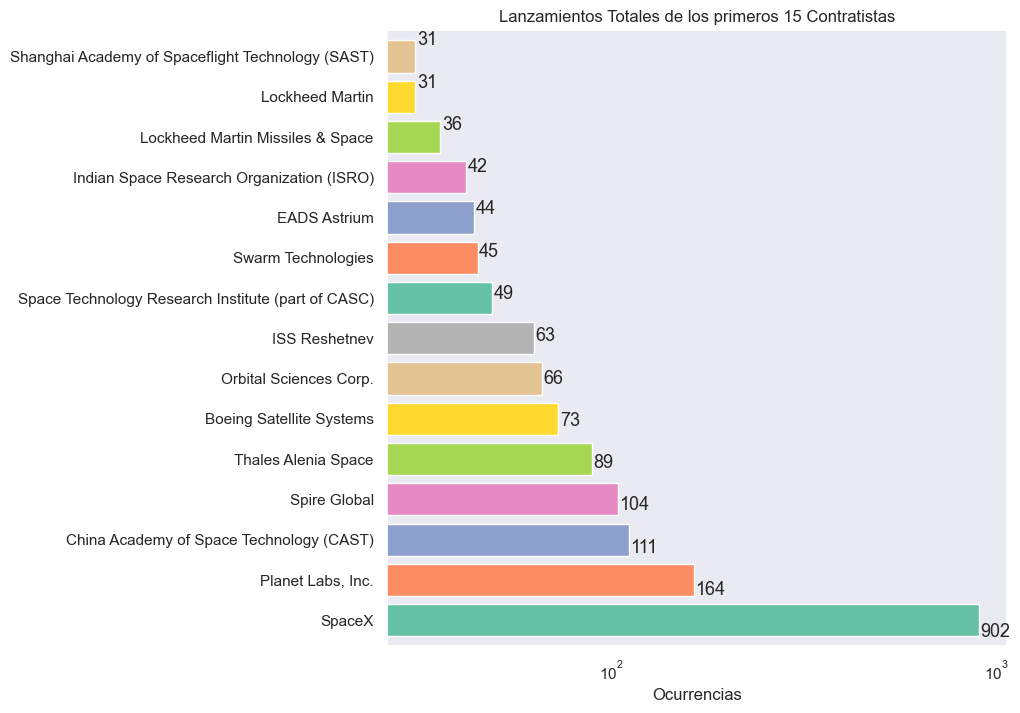

In [188]:
sns.set(style="dark")

X = [x[0] for x in contractors[:15]]
y = [int(x[1]) for x in contractors[:15]]

ser = pd.Series(y, index=X).plot(kind='barh', color=sns.color_palette('Set2', n_colors=15), width=0.8, figsize=(8,8))

set_bar_label(ser, orient='h')
plt.title('Lanzamientos Totales de los primeros 15 Contratistas')


plt.xlabel('Ocurrencias')
plt.xscale('log')
plt.show()

## Ejercicio-02: ¿Qué tan rápido se mueven los satélites? 

**Calcular la velocidad orbital media de los satélites**

La velocidad orbital media de un satélite que orbita alrededor de la Tierra es una función del período orbital y la longitud del semieje mayor de la elipse de la órbita. Podemos aproximar la velocidad orbital media usando

$$\frac{2\pi a}{T}(1-0.25e^{2})$$

donde

- $a$ : longitud del semieje mayor en kilómetros,
- $T$ : período de órbita en segundos
- $e$ : excentricidad de la órbita
    
La $\color{red}{\text{velocidad orbital media no está en la base de datos}}$. Podemos agregar una columna al marco de datos con esos valores

In [179]:
R_earth=6378.165  # en kilómetros, radio medio de la tierra.
df_sat['Mean Orbital Speed (km.sec)'] = ((2*np.pi*( (df_sat['Perigee (km)'] + df_sat['Apogee (km)'] +2*R_earth)/2)) / (df_sat['Period (minutes)']*60))*(1-0.25*df_sat['Eccentricity']**2)
display( df_sat[['Name of Satellite, Alternate Names','Class of Orbit','Mean Orbital Speed (km.sec)']].head(6))

# Criterios booleanos para el filtrado
criteria_LEO = df_sat['Class of Orbit'] == 'LEO'
criteria_MEO = df_sat['Class of Orbit'] == 'MEO'
criteria_GEO = df_sat['Class of Orbit'] == 'GEO'

# Velocidad orbital media para cualquier entrada distinta de cero o nula para satélites LEO
print(' ------------------Velocidad orbital media: estadística descriptiva LEO--------------------------------- ')
Mean_Orbital_speed_LEO = df_sat[criteria_LEO]['Mean Orbital Speed (km.sec)'].apply(pd.to_numeric,errors='coerce').dropna().mean()
print(df_sat[criteria_LEO][ 'Mean Orbital Speed (km.sec)'].dropna().describe().to_string())
print( 'Velocidad orbital media para satélites LEO con conjunto completo de parámetros en UCS: {0:6.2f} km/sec.'.format ( Mean_Orbital_speed_LEO) )

# para cualquier entrada distinta de cero o nula para satélites MEO
# (CALCULAR)

print(' ------------------Velocidad orbital media: estadística descriptiva MEO--------------------------------- ')
Mean_Orbital_speed_MEO = df_sat[criteria_MEO]['Mean Orbital Speed (km.sec)'].apply(pd.to_numeric,errors='coerce').dropna().mean()
print(df_sat[criteria_MEO][ 'Mean Orbital Speed (km.sec)'].dropna().describe().to_string())
print( 'Velocidad orbital media para satélites LEO con conjunto completo de parámetros en UCS: {0:6.2f} km/sec.'.format ( Mean_Orbital_speed_LEO) )


# para cualquier entrada distinta de cero o nula para satélites GEO
# (CALCULAR)
print(' ------------------Velocidad orbital media: estadística descriptiva GEO--------------------------------- ')
Mean_Orbital_speed_GEO = df_sat[criteria_GEO]['Mean Orbital Speed (km.sec)'].apply(pd.to_numeric,errors='coerce').dropna().mean()
print(df_sat[criteria_GEO][ 'Mean Orbital Speed (km.sec)'].dropna().describe().to_string())
print( 'Velocidad orbital media para satélites LEO con conjunto completo de parámetros en UCS: {0:6.2f} km/sec.'.format ( Mean_Orbital_speed_LEO) )



,"Name of Satellite, Alternate Names",Class of Orbit,Mean Orbital Speed (km.sec)
Date of Launch,,,
1974-11-15,Amsat-Oscar 7 (AO-7),LEO,7.134124
1988-09-29,"TDRS-3 (Tracking and Data Relay Satellite, TDR...",GEO,3.074637
1989-09-25,FLTSATCOM-8 (USA 46),GEO,3.074600
1990-04-25,"Hubble Space Telescope (HST, Space Telescope)",LEO,7.580885
1990-08-30,Skynet 4C,GEO,3.074656
1991-08-02,"TDRS-5 (Tracking and Data Relay Satellite, TDR...",GEO,3.072578


 ------------------Velocidad orbital media: estadística descriptiva LEO--------------------------------- 
count    2612.000000
mean        7.616142
std         1.454753
min         1.254861
25%         7.551334
50%         7.589345
75%         7.620344
max        81.200424
Velocidad orbital media para satélites LEO con conjunto completo de parámetros en UCS:   7.62 km/sec.
 ------------------Velocidad orbital media: estadística descriptiva MEO--------------------------------- 
count    139.000000
mean       4.247344
std        2.173390
min        3.483537
25%        3.779387
50%        3.873727
75%        3.952954
max       28.762194
Velocidad orbital media para satélites LEO con conjunto completo de parámetros en UCS:   7.62 km/sec.
 ------------------Velocidad orbital media: estadística descriptiva GEO--------------------------------- 
count    562.000000
mean       3.125323
std        1.184876
min        3.029884
25%        3.074592
50%        3.074628
75%        3.074671
max       

## Ejercicio-03: Explorando las relaciones básicas entre los atributos de los satélites 

**La relación _Masa-Potencia_**. 
    
La base de datos contiene muestras de las capacidades de _masa_ y _potencia_ de las naves espaciales. Históricamente, se ha basado en la relación entre la masa (masa seca, masa de la carga útil, masa propulsora) y la potencia para establecer reglas de primer orden para estimar la masa de la nave espacial, conociendo una envolvente de potencia. Explore entonces la relación entre la _masa seca_ de la nave espacial y la _capacidad de potencia_.

In [180]:
criteria_LEO = df_sat['Class of Orbit'] == 'LEO'
print('Masa seca promedio para un satélite LEO: {0:6.2f} kg.'.format(df_sat[criteria_LEO]['Dry Mass (kg.)'].dropna().median()))
print('Capacidad promedio de generación de energía para un satélite LEO: {0:6.2f} Watt.'.format( df_sat[criteria_LEO]['Power (watts)'].dropna().median()))
print('----------------------------------------------------------------------')

# Extraiga los mismos datos para los satélites MEO
# (CALCULAR)
criteria_MEO = df_sat['Class of Orbit'] == 'MEO'
print('Masa seca promedio para un satélite MEO: {0:6.2f} kg.'.format(df_sat[criteria_MEO]['Dry Mass (kg.)'].dropna().median()))
print('Capacidad promedio de generación de energía para un satélite LEO: {0:6.2f} Watt.'.format( df_sat[criteria_MEO]['Power (watts)'].dropna().median()))
print('----------------------------------------------------------------------')

# Extraiga los mismos datos para los satélites GEO
# (CALCULAR)
criteria_GEO = df_sat['Class of Orbit'] == 'GEO'
print('Masa seca promedio para un satélite GEO: {0:6.2f} kg.'.format(df_sat[criteria_GEO]['Dry Mass (kg.)'].dropna().median()))
print('Capacidad promedio de generación de energía para un satélite LEO: {0:6.2f} Watt.'.format( df_sat[criteria_GEO]['Power (watts)'].dropna().median()))
print('----------------------------------------------------------------------')

Masa seca promedio para un satélite LEO: 678.00 kg.
Capacidad promedio de generación de energía para un satélite LEO: 160.00 Watt.
----------------------------------------------------------------------
Masa seca promedio para un satélite MEO: 280.00 kg.
Capacidad promedio de generación de energía para un satélite LEO: 1136.00 Watt.
----------------------------------------------------------------------
Masa seca promedio para un satélite GEO: 1700.00 kg.
Capacidad promedio de generación de energía para un satélite LEO: 8500.00 Watt.
----------------------------------------------------------------------


In [181]:
df_sat[criteria_LEO][['Name of Satellite, Alternate Names','Dry Mass (kg.)']][df_sat[criteria_LEO]['Dry Mass (kg.)']>2000]

,"Name of Satellite, Alternate Names",Dry Mass (kg.)
Date of Launch,,
1999-04-15,Landsat 7,2200.0
2002-05-04,EOS-PM Aqua (Advanced Microwave Scanning Radio...,2832.0
2005-10-19,"Keyhole 5 (Advanced KH-11, KH-12-5, Improved C...",10000.0
2006-10-19,MetOp-A (Meteorological Operational satellite),3750.0
2011-01-20,"Keyhole 6 (NRO L49, Advanced KH-11, KH-12-6, I...",10000.0
2013-08-28,"Keyhole 7 (NRO L65, Advanced KH-11, Improved C...",10000.0
2014-04-03,Sentinel 1A,2146.0
2015-06-23,Sentinel 2A,2146.0
2016-02-16,Sentinel 3A,2146.0


In [182]:
df_sat[criteria_MEO][['Name of Satellite, Alternate Names','Dry Mass (kg.)']][df_sat[criteria_MEO]['Dry Mass (kg.)']>280]

,"Name of Satellite, Alternate Names",Dry Mass (kg.)
Date of Launch,,
1997-07-23,"Navstar GPS IIR-2 (Navstar SVN 43, PRN 13, USA...",980.0
1999-10-07,"Navstar GPS IIR-3 (Navstar SVN 46, PRN 11, USA...",980.0
2000-05-11,"Navstar GPS IIR-4 (Navstar SVN 51, PRN 20, USA...",980.0
2000-07-16,"Navstar GPS IIR-5 (Navstar SVN 44, PRN 28, USA...",980.0
2000-11-10,"Navstar GPS IIR-6 (Navstar SVN 41, PRN 14, USA...",980.0
2001-01-30,"Navstar GPS IIR-7 (Navstar SVN 54, PRN 18, USA...",980.0
2003-01-29,"Navstar GPS IIR-8 (Navstar SVN 56, PRN 16, USA...",980.0
2003-03-31,"Navstar GPS IIR-9 (Navstar SVN 45, PRN 21, USA...",980.0
2003-12-21,"Navstar GPS IIR-10 (Navstar SVN 47, PRN 22, US...",980.0


In [183]:
df_sat[criteria_GEO][['Name of Satellite, Alternate Names','Dry Mass (kg.)']][df_sat[criteria_GEO]['Dry Mass (kg.)']>3500]

,"Name of Satellite, Alternate Names",Dry Mass (kg.)
Date of Launch,,
1994-08-27,"Mercury 1 (Advanced Vortex 1, USA 105)",4000.0
1996-04-24,"Mercury 2 (Advanced Vortex 2, USA 118)",4000.0
2002-05-07,DirecTV-5 (Tempo 1),3640.0
2004-07-18,Anik F2,3805.0
2005-11-16,Spaceway F2,3691.0
2007-07-07,DirecTV-10,3700.0
2007-08-14,Spaceway 3,3655.0
2009-10-29,NSS-12,5624.0
2012-08-19,Intelsat 21 (IS-21),3600.0


## Ejercicio-04 

Muestre un **gráfico de dispersión** con las variables _Masa seca, Potencia_ y _Clase de órbita_ (GEO, MEO, LEO, Elliptical).   

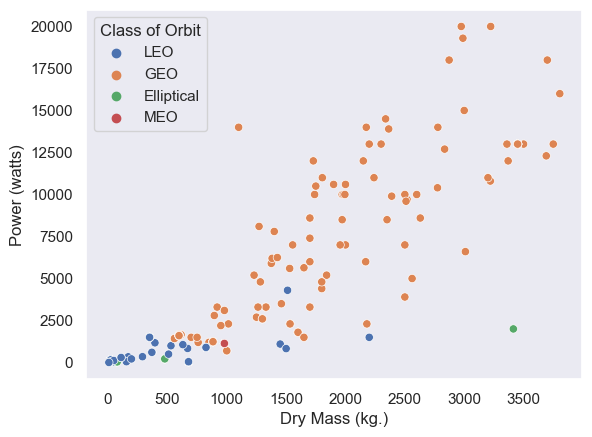

In [185]:
dry_mass = df_sat['Dry Mass (kg.)']
power = df_sat['Power (watts)']
orbit = df_sat['Class of Orbit']

sns.scatterplot(data=df_sat, x=dry_mass, y=power, hue=orbit)
plt.show()